<a href="https://www.kaggle.com/code/markkiarie/simple-ticktock-algorithm-by-mark-kiarie?scriptVersionId=222046650" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **📌 Explanation of the Code: Personalized Video Recommendation System**

This Python script simulates a personalized video recommendation system based on user interactions. It reads user data from a CSV file, ranks video categories, and visualizes recommendations.

In [56]:
import csv
import random
import matplotlib.pyplot as plt
from tabulate import tabulate
from typing import Dict, List, Tuple

# Set a font that supports Unicode characters
plt.rcParams["font.family"] = "DejaVu Sans"

# Constants
VIDEO_CATEGORIES = ["Tech", "Fitness", "Comedy", "Cooking", "Travel"]

# Function to display the dataset 
def display_dataset(users_data: List[Dict[str, str]]) -> None:

    # Prepare data for tabulate
    table_data = []
    for user in users_data:
        table_data.append([
            user["user_id"],
            user["watch_time"],
            user["likes"],
            user["comments"],
            user["shares"],
            user["rewatches"],
            user["skip_rate"],
        ])
    
    # Define headers
    headers = [
        "User ID", "Watch Time", "Likes", "Comments", "Shares", "Rewatches", "Skip Rate"
    ]
    
    # Display the table
    print("\n📊 Dataset Overview 📊")
    print(tabulate(table_data, headers=headers, tablefmt="fancy_grid", floatfmt=".2f"))
    print("\n")

# Calculate the recommendation score for a video category based on user preferences.
    
Args:
        category_score (float): The base score for the video category.
        user_prefs (Dict[str, float]): User interaction weights (e.g., watch time, likes, etc.).
    
Returns:
        float: The calculated recommendation score.


In [57]:


# Function to calculate recommendation score based on user behavior
def calculate_recommendation_score(category_score: float, user_prefs: Dict[str, float]) -> float:

    score = (
        category_score * user_prefs["watch_time"] +
        category_score * user_prefs["likes"] +
        category_score * user_prefs["comments"] +
        category_score * user_prefs["shares"] +
        category_score * user_prefs["rewatches"] -
        category_score * user_prefs["skip_rate"]
    )
    return score




# Rank video categories based on user preferences and engagement scores.
    
    Args:
        user_prefs (Dict[str, float]): User interaction weights.
        video_categories (List[str]): List of video categories.
    
    Returns:
        List[Tuple[str, float]]: Ranked list of video categories with their scores.


In [58]:
# Function to rank video categories based on user preferences
def rank_video_categories(user_prefs: Dict[str, float], video_categories: List[str]) -> List[Tuple[str, float]]:

    # Generate random engagement scores for each category
    video_scores = {category: random.uniform(0, 1) for category in video_categories}
    
    # Rank videos based on calculated scores
    ranked_videos = sorted(
        video_scores.items(),
        key=lambda x: calculate_recommendation_score(x[1], user_prefs),
        reverse=True
    )
    return ranked_videos




# Display and visualize recommended video categories for a user.
    
    Args:
        user_prefs (Dict[str, float]): User interaction weights.
        video_categories (List[str]): List of video categories.
        user_id (int): The ID of the user.


In [59]:
# Function to display recommendations and visualize them
def display_recommendations(user_prefs: Dict[str, float], video_categories: List[str], user_id: int) -> None:

    ranked_videos = rank_video_categories(user_prefs, video_categories)
    
    # Print recommendations
    print(f"\n🎯 Recommendations for User {user_id}:")
    for category, score in ranked_videos:
        print(f"  - {category}: {score:.2f}")
    
    # Visualize recommendations
    categories, scores = zip(*ranked_videos)  # Unzip the ranked_videos list
    plt.figure(figsize=(10, 6))
    plt.bar(categories, scores, color='skyblue')
    plt.title(f"📺 Recommended Video Categories for User {user_id}")
    plt.xlabel("Video Categories")
    plt.ylabel("Recommendation Score")
    plt.ylim(0, 1)  # Set y-axis limit to match score range
    plt.show()

# Main function to read CSV and process data
def main():
    # Read the CSV file
    with open("/kaggle/input/ticktock-user-testdata/Ticktock_user_testdata.csv", mode="r") as file:
        reader = csv.DictReader(file)
        users_data = list(reader)
    
    # Display the dataset creatively
    display_dataset(users_data)
    
    # Process each user's data
    for user in users_data:
        # Convert string values to floats
        user_prefs = {
            "watch_time": float(user["watch_time"]),
            "likes": float(user["likes"]),
            "comments": float(user["comments"]),
            "shares": float(user["shares"]),
            "rewatches": float(user["rewatches"]),
            "skip_rate": float(user["skip_rate"]),
        }
        
        # Display and visualize recommendations
        display_recommendations(user_prefs, VIDEO_CATEGORIES, int(user["user_id"]))



# Run the program


📊 Dataset Overview 📊
╒═══════════╤══════════════╤═════════╤════════════╤══════════╤═════════════╤═════════════╕
│   User ID │   Watch Time │   Likes │   Comments │   Shares │   Rewatches │   Skip Rate │
╞═══════════╪══════════════╪═════════╪════════════╪══════════╪═════════════╪═════════════╡
│         1 │         0.75 │    0.65 │       0.40 │     0.55 │        0.85 │        0.25 │
├───────────┼──────────────┼─────────┼────────────┼──────────┼─────────────┼─────────────┤
│         2 │         0.90 │    0.80 │       0.60 │     0.70 │        0.95 │        0.10 │
├───────────┼──────────────┼─────────┼────────────┼──────────┼─────────────┼─────────────┤
│         3 │         0.60 │    0.50 │       0.30 │     0.40 │        0.70 │        0.30 │
├───────────┼──────────────┼─────────┼────────────┼──────────┼─────────────┼─────────────┤
│         4 │         0.85 │    0.75 │       0.55 │     0.65 │        0.90 │        0.15 │
├───────────┼──────────────┼─────────┼────────────┼──────────┼──────

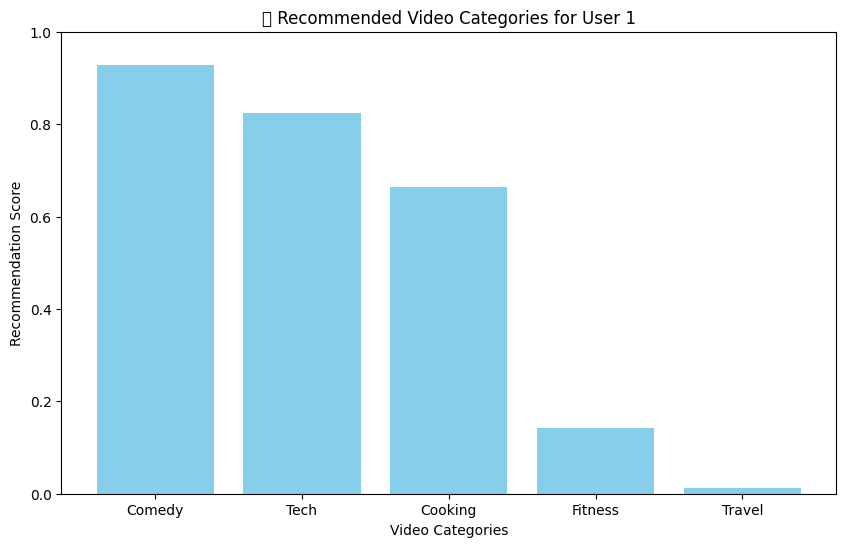


🎯 Recommendations for User 2:
  - Comedy: 0.73
  - Fitness: 0.60
  - Tech: 0.55
  - Travel: 0.47
  - Cooking: 0.07


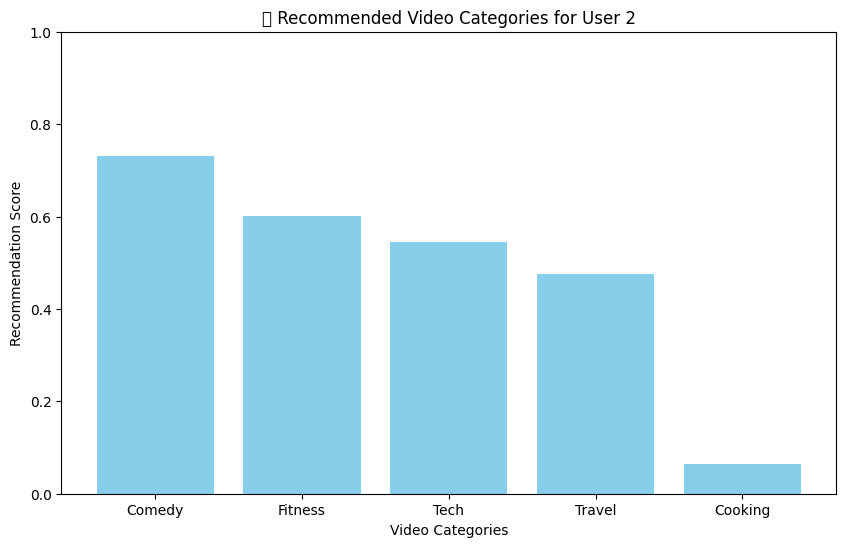


🎯 Recommendations for User 3:
  - Tech: 0.45
  - Travel: 0.40
  - Fitness: 0.39
  - Cooking: 0.35
  - Comedy: 0.23


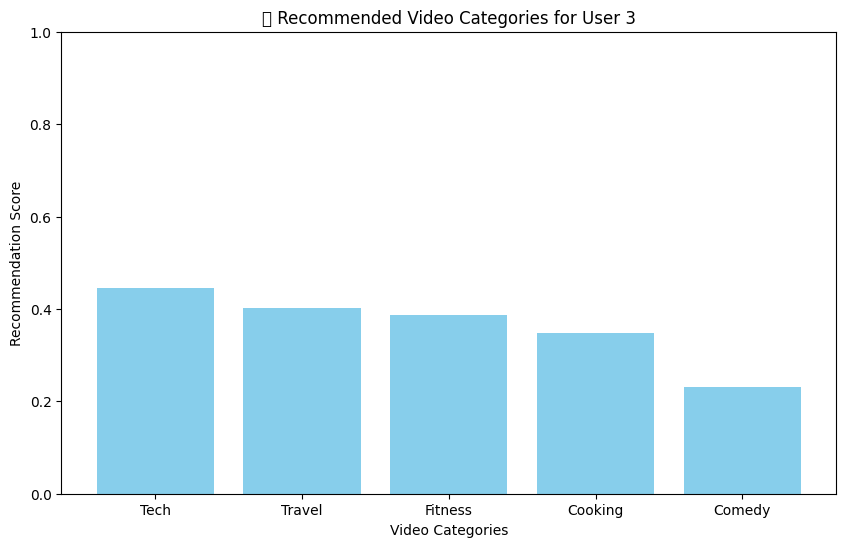


🎯 Recommendations for User 4:
  - Cooking: 0.56
  - Comedy: 0.47
  - Travel: 0.37
  - Tech: 0.31
  - Fitness: 0.02


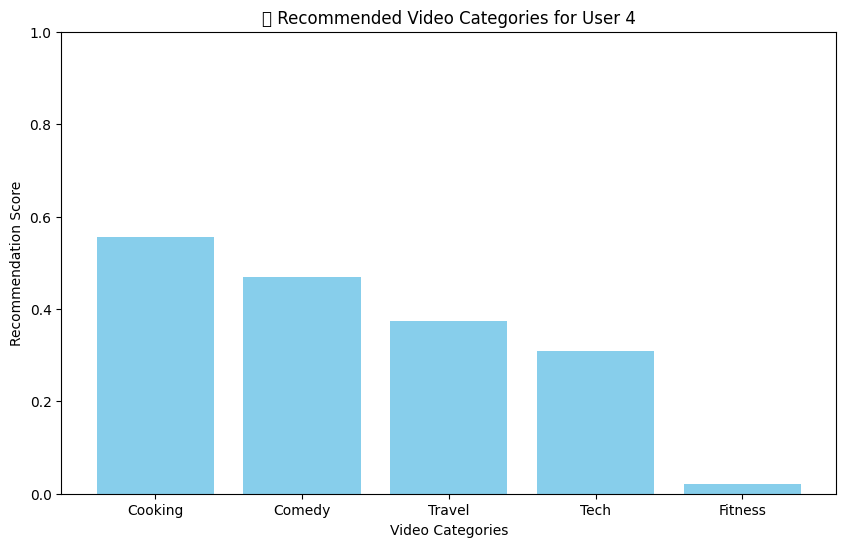


🎯 Recommendations for User 5:
  - Cooking: 0.75
  - Fitness: 0.66
  - Tech: 0.37
  - Comedy: 0.07
  - Travel: 0.01


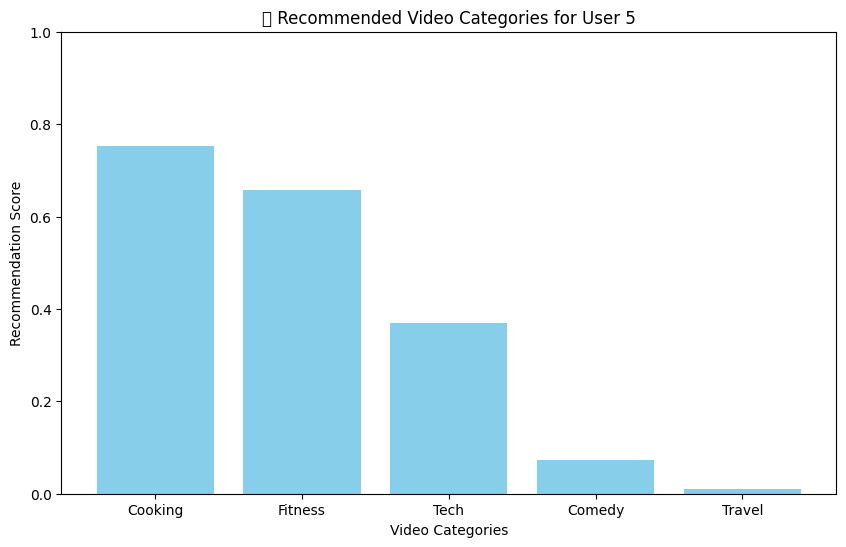


🎯 Recommendations for User 6:
  - Tech: 0.80
  - Cooking: 0.68
  - Travel: 0.50
  - Fitness: 0.30
  - Comedy: 0.01


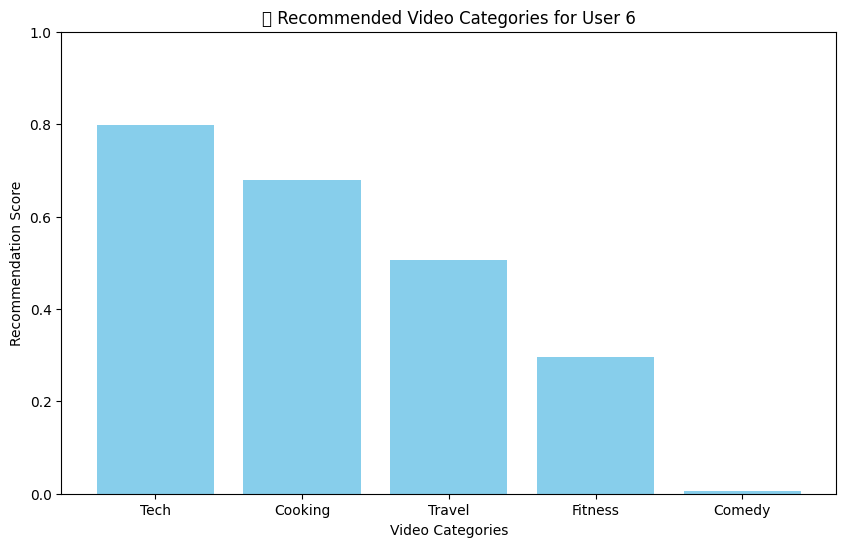


🎯 Recommendations for User 7:
  - Tech: 0.92
  - Travel: 0.32
  - Fitness: 0.27
  - Cooking: 0.22
  - Comedy: 0.10


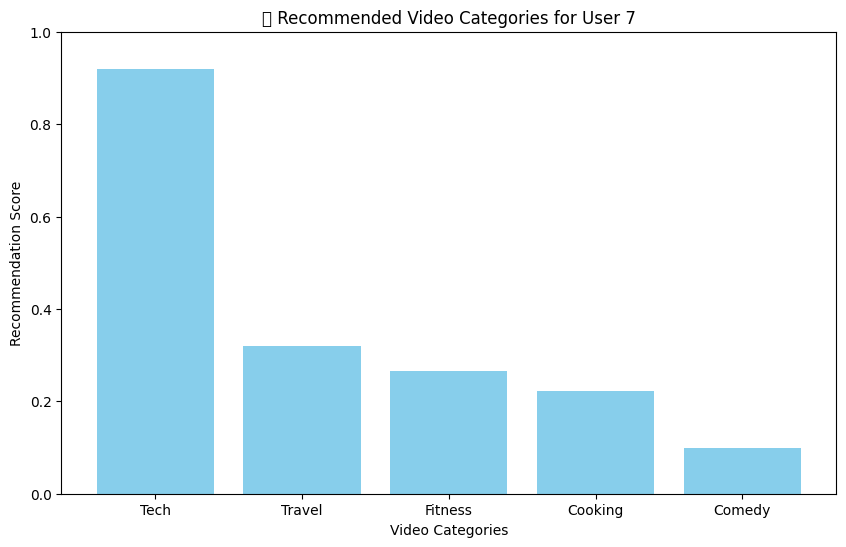


🎯 Recommendations for User 8:
  - Cooking: 0.85
  - Fitness: 0.61
  - Tech: 0.48
  - Comedy: 0.41
  - Travel: 0.07


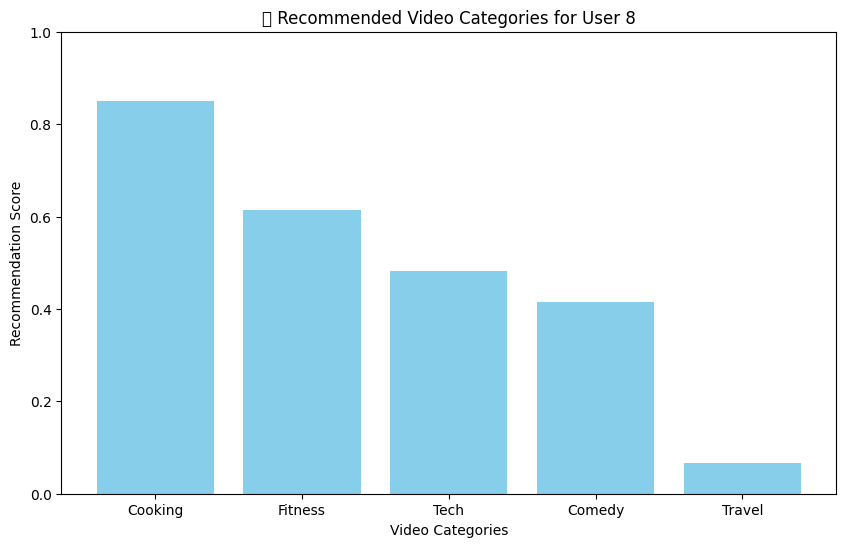


🎯 Recommendations for User 9:
  - Comedy: 0.88
  - Travel: 0.67
  - Fitness: 0.58
  - Tech: 0.45
  - Cooking: 0.40


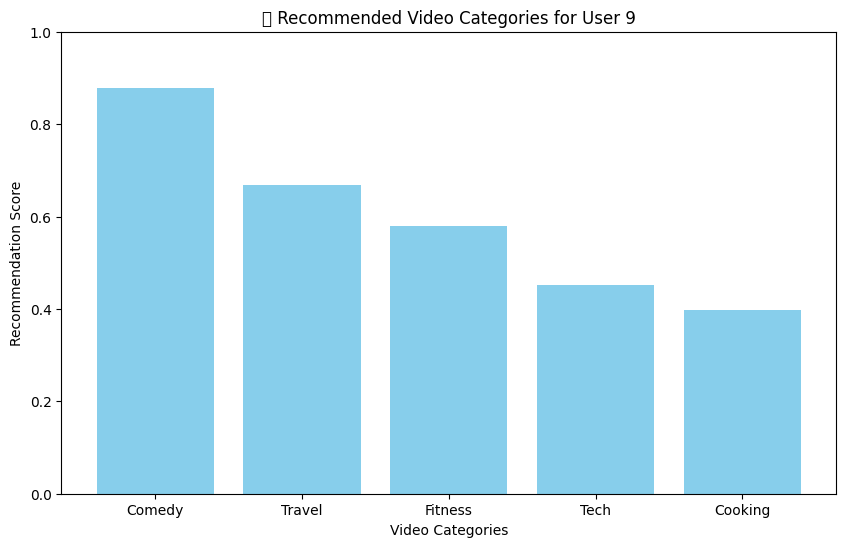


🎯 Recommendations for User 10:
  - Cooking: 0.85
  - Comedy: 0.81
  - Travel: 0.64
  - Fitness: 0.52
  - Tech: 0.41


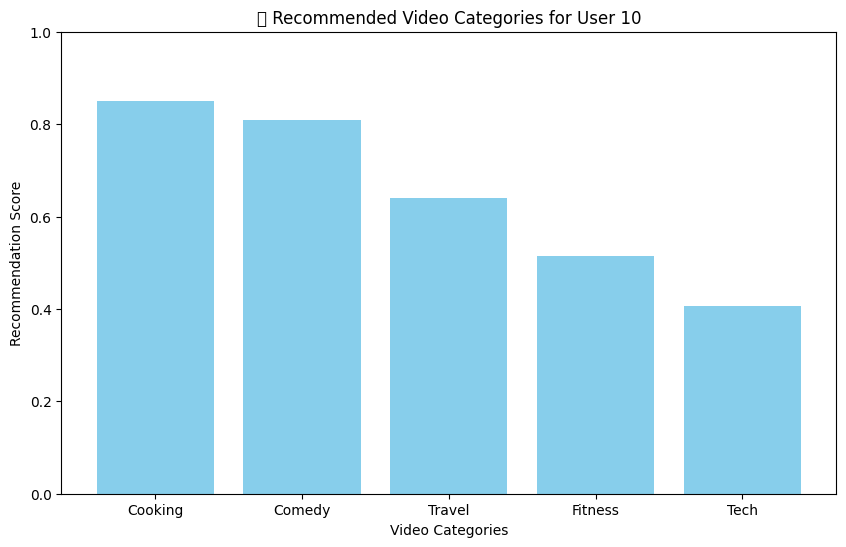

In [60]:

if __name__ == "__main__":
    main()